**Two-Hoop Loop Function**

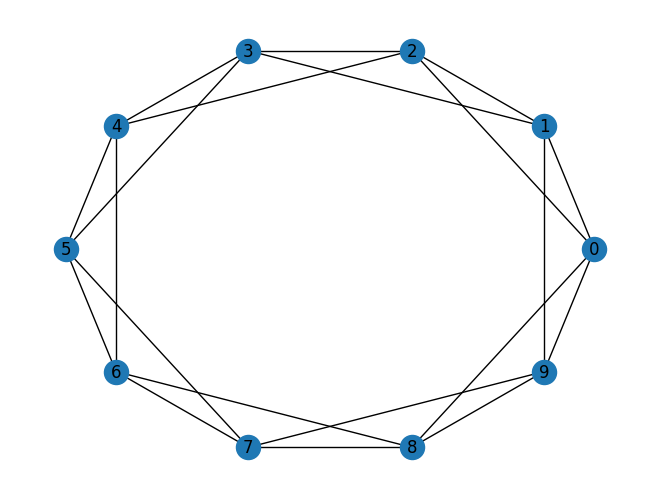

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def k_hop_loop(n,k=2, weight_sum = 1):
  positions = nx.circular_layout(range(n))

  # create a graph with n nodes
  G = nx.Graph()
  G.add_nodes_from(range(n))

  # add edges between each node and its two neighbors
  for j in range(1,k+1):
    for i in range(n):
        G.add_edge(i, (i + j) % n,weight = 1)
        G.add_edge(i, (i - j) % n, weight = 2)


  # draw the graph
  nx.draw(G, positions, with_labels=True)
  return G, positions

# example usage
k_hop_loop(10,2)
plt.show()

**Paired Two-Hop Loop Function**

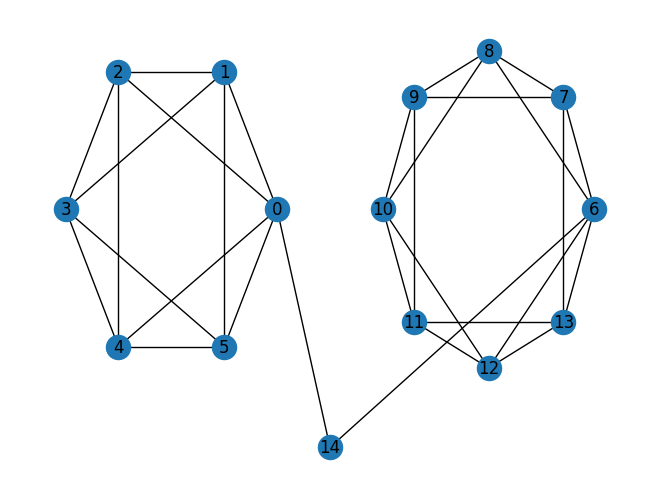

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def paired_two_hop_loop(n1, n2):
    # create two two-hop loop graphs
    G1, pos1 = k_hop_loop(n1)
    G2, pos2 = k_hop_loop(n2)

    # adjust positions to place the second graph to the right of the first graph
    offset = 3.0  # distance to separate the two graphs
    for key in pos2:
        pos2[key][0] += offset

    # relabel nodes in the second graph to avoid overlap
    G2 = nx.relabel_nodes(G2, lambda x: x + n1)
    pos2 = {key + n1: value for key, value in pos2.items()}

    # create a new graph that includes both two-hop loops
    G = nx.Graph()
    G.add_nodes_from(G1.nodes(data=True))
    G.add_nodes_from(G2.nodes(data=True))
    G.add_edges_from(G1.edges(data=True))
    G.add_edges_from(G2.edges(data=True))

    # add a single node connecting to one node from each two-hop loop
    connecting_node = n1 + n2
    G.add_node(connecting_node)
    G.add_edge(connecting_node, 0)  # Connect to the first node of G1
    G.add_edge(connecting_node, n1)  # Connect to the first node of G2

    # update positions for drawing
    pos1.update(pos2)
    pos1[connecting_node] = [offset / 2, -1.5]

    # draw the graph
    nx.draw(G, pos1, with_labels=True)
    return G

# example usage
paired_two_hop_loop(6, 8)
plt.show()